How does chaizards speed compare to other first generation pokemons on avergage.

In [ ]:
census of all first generation pokemon 
some biases could be that some of the pokemon arent fully evoloved 
giving the average I get an overesimation due to charizards unfair advantage.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('pokemon.csv')
print("First 5 rows:")
display(df.head())

First 5 rows:


,name,pokedex_number,abilities,attack,capture_rate,classfication,defense,height_m,hp,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Minior,774,['Shields Down'],100,30 (Meteorite)255 (Core),Meteor Pokémon,60,0.3,60,100,60,120,rock,flying,40.0,7,0
1,Pheromosa,795,['Beast Boost'],137,255,Lissome Pokémon,37,1.8,71,137,37,151,bug,fighting,25.0,7,1
2,Kartana,798,['Beast Boost'],181,255,Drawn Sword Pokémon,131,0.3,59,59,31,109,grass,steel,0.1,7,1
3,Poliwag,60,"['Water Absorb', 'Damp', 'Swift Swim']",50,255,Tadpole Pokémon,40,0.6,40,40,40,90,water,NaN,12.4,1,0
4,Diglett,50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",55,255,Mole Pokémon,30,NaN,10,35,45,90,ground,ground,NaN,1,0


In [16]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.columns

Index(['name', 'pokedex_number', 'abilities', 'attack', 'capture_rate',
       'classfication', 'defense', 'height_m', 'hp', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='speed', ylabel='Count'>

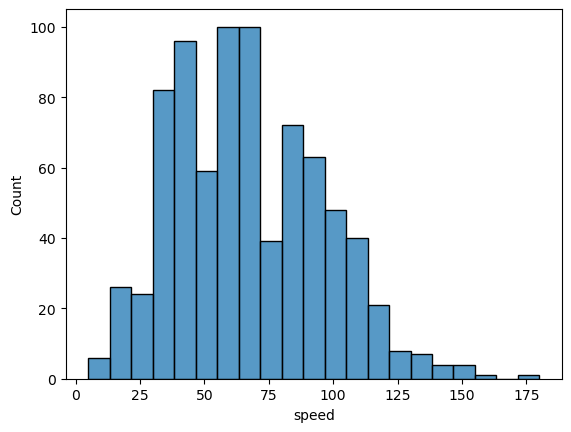

In [17]:
sns.histplot(data=pokemon, x="speed")

In [19]:
pokemon["speed"].mean()

66.33458177278402

In [ ]:
df = pd.read_csv("pokemon.csv")
std_deviation = df.std()
print(std_deviation)


Charizard's speed: 100
Average speed of all first-generation Pokémon: 70.15

Charizard is 29.85 speed points faster than the average Gen 1 Pokémon.


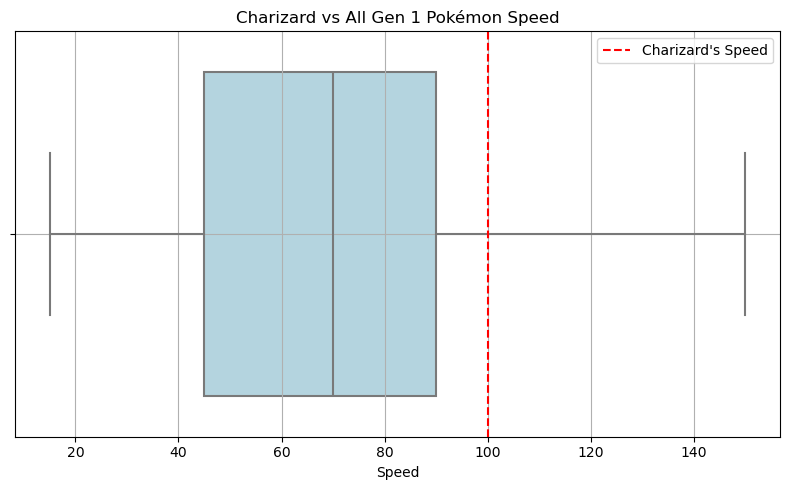

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('pokemon.csv')

# Standardize column names (optional but useful)
df.columns = df.columns.str.lower()

# Define key columns
name_col = 'name'
speed_col = 'speed'
gen_col = 'generation'

# --- Step 1: Get Charizard's speed ---
charizard_row = df[df[name_col].str.lower() == 'charizard']
if not charizard_row.empty:
    charizard_speed = charizard_row.iloc[0][speed_col]
    print(f"\nCharizard's speed: {charizard_speed}")
else:
    raise ValueError("Charizard not found in the dataset.")

# --- Step 2: Get all Gen 1 Pokémon and calculate average speed ---
gen1_df = df[df[gen_col] == 1]
avg_speed = gen1_df[speed_col].mean()
print(f"Average speed of all first-generation Pokémon: {avg_speed:.2f}")

# --- Step 3: Compare ---
diff = charizard_speed - avg_speed
comparison = "faster than" if diff > 0 else "slower than" if diff < 0 else "equal to"
print(f"\nCharizard is {abs(diff):.2f} speed points {comparison} the average Gen 1 Pokémon.")

# --- Optional: Visualization ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=gen1_df, x=speed_col, color='lightblue')
plt.axvline(charizard_speed, color='red', linestyle='--', label="Charizard's Speed")
plt.title('Charizard vs All Gen 1 Pokémon Speed')
plt.xlabel('Speed')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


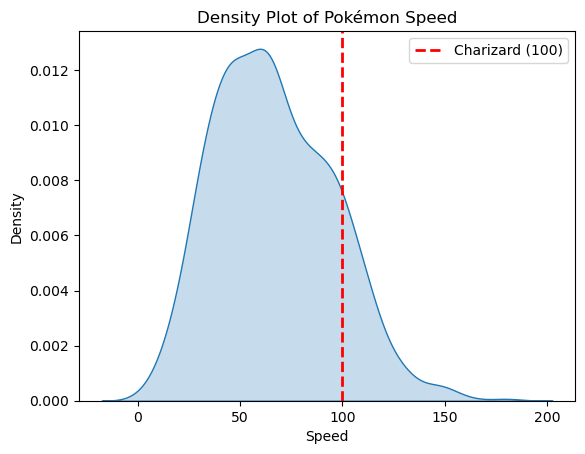

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
pokemon = pd.read_csv("pokemon.csv")

# Optional: clean the data
pokemon = pokemon.replace([np.inf, -np.inf], np.nan).dropna(subset=["speed"])

# Get Charizard's speed
charizard_row = pokemon[pokemon["name"].str.lower() == "charizard"]
if not charizard_row.empty:
    charizard_speed = charizard_row["speed"].values[0]
else:
    raise ValueError("Charizard not found in the dataset!")

# Plot density
sns.kdeplot(data=pokemon, x="speed", fill=True)

# Add vertical line for Charizard's speed
plt.axvline(charizard_speed, color='red', linestyle='--', linewidth=2, label=f"Charizard ({charizard_speed})")

# Add labels and legend
plt.title("Density Plot of Pokémon Speed")
plt.xlabel("Speed")
plt.ylabel("Density")
plt.legend()
plt.show()


In [10]:
import pandas as pd

# Load the dataset
pokemon = pd.read_csv("pokemon.csv")

# Clean the data (remove NaN or inf values in speed)
pokemon = pokemon.replace([float("inf"), float("-inf")], pd.NA).dropna(subset=["speed"])

# Get mean and standard deviation of speed
mean_speed = pokemon["speed"].mean()
std_speed = pokemon["speed"].std()

# Find Charizard's speed
charizard_row = pokemon[pokemon["name"].str.lower() == "charizard"]
if not charizard_row.empty:
    charizard_speed = charizard_row["speed"].values[0]
    z_score = (charizard_speed - mean_speed) / std_speed
    print(f"Charizard's speed: {charizard_speed}")
    print(f"Mean speed: {mean_speed:.2f}")
    print(f"Standard deviation of speed: {std_speed:.2f}")
    print(f"Charizard's z-score: {z_score:.2f}")
else:
    print("Charizard not found in the dataset.")

Charizard's speed: 100
Mean speed: 66.33
Standard deviation of speed: 28.91
Charizard's z-score: 1.16


In [11]:
import pandas as pd

pokemon = pd.read_csv("pokemon.csv")

# Clean data
pokemon = pokemon.replace([float('inf'), float('-inf')], pd.NA).dropna(subset=['speed'])

# Get Charizard's speed
charizard_speed = pokemon.loc[pokemon["name"].str.lower() == "charizard", "speed"].values[0]

# Calculate percentile rank of Charizard's speed among all Pokémon
percentile = (pokemon["speed"] < charizard_speed).mean() * 100

print(f"Charizard's speed percentile: {percentile:.2f}th percentile")

Charizard's speed percentile: 84.77th percentile


In conclusion Charizards speed in much faster then other first generation pokemons my quite a large margin, Charizards speed is at 100 while the mean speed for first generation pokemons is 66.3. Moreso according to my SD finds Charizard is 1.16 standard deviations away from the mean number making him significantly faster then avarage and is in the 84.77th percentile speed wise.